In [692]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import statistics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import sklearn
import prepare
import acquire

from sklearn.ensemble import RandomForestClassifier


What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [693]:
titanic_df = prepare.prep_titanic()
prediction_col = "survived"

titanic_mod_df = titanic_df.drop(columns=["passenger_id","embark_town","sex"])

train_df,test_df,validate_df = prepare.split_function(titanic_mod_df,prediction_col)

baseline_predict = train_df.survived.mode()[0]
(train_df[prediction_col] == baseline_predict).mean()

print(f"{baseline_predict} <--- mode of survived in training data / baseline prediction")
print(f"{(train_df[prediction_col] == baseline_predict).mean() * 100 :.2f}% <--- accuracy of baseline prediciton in training data")


prepared df shape: (891, 9)
train shape: (534, 9)
validate shape: (178, 9)
test shape: (179, 9)
0 <--- mode of survived in training data / baseline prediction
61.61% <--- accuracy of baseline prediciton in training data


In [694]:
X_titanic_train = train_df.drop(columns = [prediction_col])
y_titanic_train = train_df[prediction_col]

X_titanic_validate = validate_df.drop(columns = [prediction_col])
y_titanic_validate = validate_df[prediction_col]

X_titanic_test = test_df.drop(columns = [prediction_col])
y_titanic_test = test_df[prediction_col]

In [695]:
def give_it_a_go(X_train,y_train,X_validate,y_validate,depth):
      ''' 
      takes in train and validate sets, with a depth and runs
      basic model info and classification reports
      i was putting in multiple depths and running a lot
      of the same information, this does that so i can play with depth
      '''

      clf = DecisionTreeClassifier(max_depth= depth,random_state= 123, criterion="gini")
      clf = clf.fit(X_train,y_train)

      y_pred = clf.predict(X_train)
      y_pred_proba = clf.predict_proba(X_train)
      clf.classes_mod = str(clf.classes_)

      plt.figure(figsize=(40,20))
      plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_mod, rounded=True)
      plt.show()

      print(f'Accuracy of Decision Tree classifier(gini / {depth}) on training set: ','{:.2f}'
            .format(clf.score(X_train, y_train)))

      labels = sorted(y_train.unique())
      confusion = pd.DataFrame(confusion_matrix(y_train,y_pred),
                                    index=labels,
                                    columns=labels
                                    )
      temp = pd.DataFrame([["TN","FP"],
            ["FN","TP"]])
      info_temp = temp.astype(str) + ":" + confusion.astype(str)
      print(info_temp)
      
      TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()

      print(classification_report(y_train,y_pred), f"---------------{depth} depth set---------------")

      all = TP + FP + FN + TN
      acc = (TP + TN)/all
      TPR = recall = TP / (TP+FN)
      FPR = FP / (FP+TN)
      TNR = (TN / ( TN + FP ))
      FNR = FN / (FN + TP)
      precision = TP / (TP + FP)
      f1_score = 2*(precision*recall)/(precision+recall)
      support_pos = TP+FN
      support_neg = (FP + TN)
      print(round(acc,3),"<--accuracy", \
            round(TPR,3),"<--True positive rate", \
            round(FPR,3), "<--false positive rate/recall", \
            round(TNR,3), "<--true negative rate", \
            round(FNR,3), "<--false negative rate", \
            round(precision,3), "<--precision", \
            round(f1_score,3),"<--f1_score", \
            round(support_pos,3),round(support_neg,3),"<--support pos, support neg")

      print(f"\n \n \n \n \n")

      print(f'Accuracy of Decision Tree classifier (depth {depth}) on validate set: ','{:.2f}'
      .format(clf.score(X_validate, y_validate)))

      y_pred_val = clf.predict(X_validate)
      print(classification_report(y_validate, y_pred_val))



Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [696]:
clf_gini0 = DecisionTreeClassifier(random_state= 123, criterion="gini")
clf_gini0 = clf_gini0.fit(X_titanic_train,y_titanic_train)
#clf_gini0.classes_ = str(clf_gini0.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini0, feature_names=X_titanic_train.columns, class_names=clf_gini0.classes_, rounded=True)
clf_gini1 = DecisionTreeClassifier(max_depth= 1,random_state= 123, criterion="gini")
clf_gini1 = clf_gini1.fit(X_titanic_train,y_titanic_train)
#clf_gini1.classes_ = str(clf_gini1.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini1, feature_names=X_titanic_train.columns, class_names=clf_gini1.classes_, rounded=True)
clf_gini3 = DecisionTreeClassifier(max_depth= 3, random_state= 123, criterion="gini")
clf_gini3 = clf_gini3.fit(X_titanic_train,y_titanic_train)
#clf_gini3.classes_ = str(clf_gini3.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini3, feature_names=X_titanic_train.columns, class_names=clf_gini3.classes_, rounded=True)
clf_gini5 = DecisionTreeClassifier(max_depth= 5,random_state= 123, criterion="gini")
clf_gini5 = clf_gini5.fit(X_titanic_train,y_titanic_train)
#clf_gini5.classes_ = str(clf_gini5.classes_)
plt.figure(figsize=(20,10))
#plot_tree(clf_gini5, feature_names=X_titanic_train.columns, class_names=clf_gini5.classes_, rounded=True)
plt.show()

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [697]:
y_pred_gini0 = clf_gini0.predict(X_titanic_train)
y_pred_proba_gini0 = clf_gini0.predict_proba(X_titanic_train)
print(y_pred_proba_gini0[0:5],"gini0")
y_pred_gini1 = clf_gini1.predict(X_titanic_train)
y_pred_proba_gini1 = clf_gini1.predict_proba(X_titanic_train)
print(y_pred_proba_gini1[0:5],"gini1")
y_pred_gini3 = clf_gini3.predict(X_titanic_train)
y_pred_proba_gini3 = clf_gini3.predict_proba(X_titanic_train)
print(y_pred_proba_gini3[0:5],"gini3")
y_pred_gini5 = clf_gini5.predict(X_titanic_train)
y_pred_proba_gini5 = clf_gini5.predict_proba(X_titanic_train)
print(y_pred_proba_gini5[0:5],"gini5")

[[0.75 0.25]
 [0.   1.  ]
 [0.5  0.5 ]
 [0.   1.  ]
 [1.   0.  ]] gini0
[[0.81321839 0.18678161]
 [0.24731183 0.75268817]
 [0.81321839 0.18678161]
 [0.81321839 0.18678161]
 [0.81321839 0.18678161]] gini1
[[0.905      0.095     ]
 [0.01785714 0.98214286]
 [0.69105691 0.30894309]
 [0.69105691 0.30894309]
 [0.905      0.095     ]] gini3
[[0.9122807  0.0877193 ]
 [0.         1.        ]
 [0.60240964 0.39759036]
 [0.60240964 0.39759036]
 [0.9122807  0.0877193 ]] gini5


Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [698]:
#Remember that Accuracy is the number of correct predictions 
# over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_titanic_train, y_titanic_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_titanic_train, y_titanic_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_titanic_train, y_titanic_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_titanic_train, y_titanic_train)))


Accuracy of Decision Tree classifier(gini / no depth) on training set: 0.95
Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.79
Accuracy of Decision Tree classifier(gini / depth - 3) on training set: 0.82
Accuracy of Decision Tree classifier(gini / depth - 5) on training set: 0.83


In [699]:
labels = sorted(y_titanic_train.unique())

gini0_confusion = pd.DataFrame(confusion_matrix(y_titanic_train,y_pred_gini0),
                                index=labels,
                                columns=labels
                                )
TN0, FP0, FN0, TP0 = confusion_matrix(y_titanic_train,y_pred_gini0).ravel()
print(gini0_confusion)
print("^^^0^^^")

gini1_confusion = pd.DataFrame(confusion_matrix(y_titanic_train,y_pred_gini1),
                                index=labels,
                                columns=labels
                                )
TN1, FP1, FN1, TP1 = confusion_matrix(y_titanic_train,y_pred_gini1).ravel()
print(gini1_confusion)
print("^^^1^^^")

gini3_confusion = pd.DataFrame(confusion_matrix(y_titanic_train,y_pred_gini3),
                                index=labels,
                                columns=labels
                                )
TN3, FP3, FN3, TP3 = confusion_matrix(y_titanic_train,y_pred_gini3).ravel()
print(gini3_confusion)
print("^^^3^^^")

gini5_confusion = pd.DataFrame(confusion_matrix(y_titanic_train,y_pred_gini5),
                                index=labels,
                                columns=labels
                                )
TN5, FP5, FN5, TP5 = confusion_matrix(y_titanic_train,y_pred_gini5).ravel()
print(gini5_confusion)
print("^^^5^^^")

     0    1
0  327    2
1   27  178
^^^0^^^
     0    1
0  283   46
1   65  140
^^^1^^^
     0    1
0  295   34
1   63  142
^^^3^^^
     0    1
0  322    7
1   82  123
^^^5^^^


In [700]:
print(classification_report(y_titanic_train,y_pred_gini0), "---------------no depth set---------------")

print(classification_report(y_titanic_train,y_pred_gini1), "---------------1 depth---------------")

print(classification_report(y_titanic_train,y_pred_gini3), "---------------3 depth---------------")

print(classification_report(y_titanic_train,y_pred_gini5), "---------------5 depth---------------")



              precision    recall  f1-score   support

           0       0.92      0.99      0.96       329
           1       0.99      0.87      0.92       205

    accuracy                           0.95       534
   macro avg       0.96      0.93      0.94       534
weighted avg       0.95      0.95      0.94       534
 ---------------no depth set---------------
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       329
           1       0.75      0.68      0.72       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.78       534
weighted avg       0.79      0.79      0.79       534
 ---------------1 depth---------------
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.79      0.80    

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [701]:
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_titanic_train, y_titanic_train)))
print('True Positive/Recall of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TP0/(TP0+FN0)))
print('False Positive/Fall-out of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(FP0/(FP0+TN0)))
print('True Negative/Specificity of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TN0/(TN0+FP0)))
print('False Negative/Miss of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(FN0/(FN0+TP0)))
print('Precision/PPV of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(TP0/(TP0+FP0)))
print()
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_titanic_train, y_titanic_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TP1/(TP1+FN1)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(FP1/(FP1+TN1)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TN1/(TN1+FP1)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(FN1/(FN1+TP1)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(TP1/(TP1+FP1)))
print()

print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_titanic_train, y_titanic_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TP3/(TP3+FN3)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(FP3/(FP3+TN3)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TN3/(TN3+FP3)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(FN3/(FN3+TP3)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(TP3/(TP3+FP3)))
print()

print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_titanic_train, y_titanic_train)))
print('True Positive/Recall of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TP5/(TP5+FN5)))
print('False Positive/Fall-out of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(FP5/(FP5+TN5)))
print('True Negative/Specificity of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TN5/(TN5+FP5)))
print('False Negative/Miss of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(FN5/(FN5+TP5)))
print('Precision/PPV of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(TP5/(TP5+FP5)))
print()

Accuracy of Decision Tree classifier(gini / no depth) on training set: 0.95
True Positive/Recall of Decision Tree classifier(gini / no depth) on training set: 0.87
False Positive/Fall-out of Decision Tree classifier(gini / no depth) on training set: 0.01
True Negative/Specificity of Decision Tree classifier(gini / no depth) on training set: 0.99
False Negative/Miss of Decision Tree classifier(gini / no depth) on training set: 0.13
Precision/PPV of Decision Tree classifier(gini / no depth) on training set: 0.99

Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.79
True Positive/Recall of Decision Tree classifier(gini / depth - 1) on training set: 0.68
False Positive/Fall-out of Decision Tree classifier(gini / depth - 1) on training set: 0.14
True Negative/Specificity of Decision Tree classifier(gini / depth - 1) on training set: 0.86
False Negative/Miss of Decision Tree classifier(gini / depth - 1) on training set: 0.32
Precision/PPV of Decision Tree classifier(g

Which model performs better on your in-sample data?
 - "no depth model, high likelyhood of overfitting in validation though"


Which model performs best on your out-of-sample data, the validate set?

In [702]:
print('Accuracy of Decision Tree classifier (gini0) on validate set: {:.2f}'
     .format(clf_gini0.score(X_titanic_validate, y_titanic_validate)))
print('Accuracy of Decision Tree classifier (gini1) on validate set: {:.2f}'
     .format(clf_gini1.score(X_titanic_validate, y_titanic_validate)))
print('Accuracy of Decision Tree classifier (gini3) on validate set: {:.2f}'
     .format(clf_gini3.score(X_titanic_validate, y_titanic_validate)))
print('Accuracy of Decision Tree classifier (gini5) on validate set: {:.2f}'
     .format(clf_gini5.score(X_titanic_validate, y_titanic_validate)))

Accuracy of Decision Tree classifier (gini0) on validate set: 0.74
Accuracy of Decision Tree classifier (gini1) on validate set: 0.78
Accuracy of Decision Tree classifier (gini3) on validate set: 0.79
Accuracy of Decision Tree classifier (gini5) on validate set: 0.74


In [703]:
# Produce y_predictions that come from the X_titanic_validate
y_pred_gini0_val = clf_gini0.predict(X_titanic_validate)
# Compare actual y values (from validate) to predicted y_values from the model run on X_titanic_validate
print(classification_report(y_titanic_validate, y_pred_gini0_val))

y_pred_gini1_val = clf_gini1.predict(X_titanic_validate)
print(classification_report(y_titanic_validate, y_pred_gini1_val))

y_pred_gini3_val = clf_gini3.predict(X_titanic_validate)
print(classification_report(y_titanic_validate, y_pred_gini3_val))

y_pred_gini5_val = clf_gini5.predict(X_titanic_validate)
print(classification_report(y_titanic_validate, y_pred_gini5_val))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79       110
           1       0.66      0.66      0.66        68

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       110
           1       0.71      0.69      0.70        68

    accuracy                           0.78       178
   macro avg       0.76      0.76      0.76       178
weighted avg       0.77      0.78      0.77       178

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

              preci

the model with a depth of 3
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
   macro avg       0.78      0.77      0.78       178
weighted avg       0.79      0.79      0.79       178

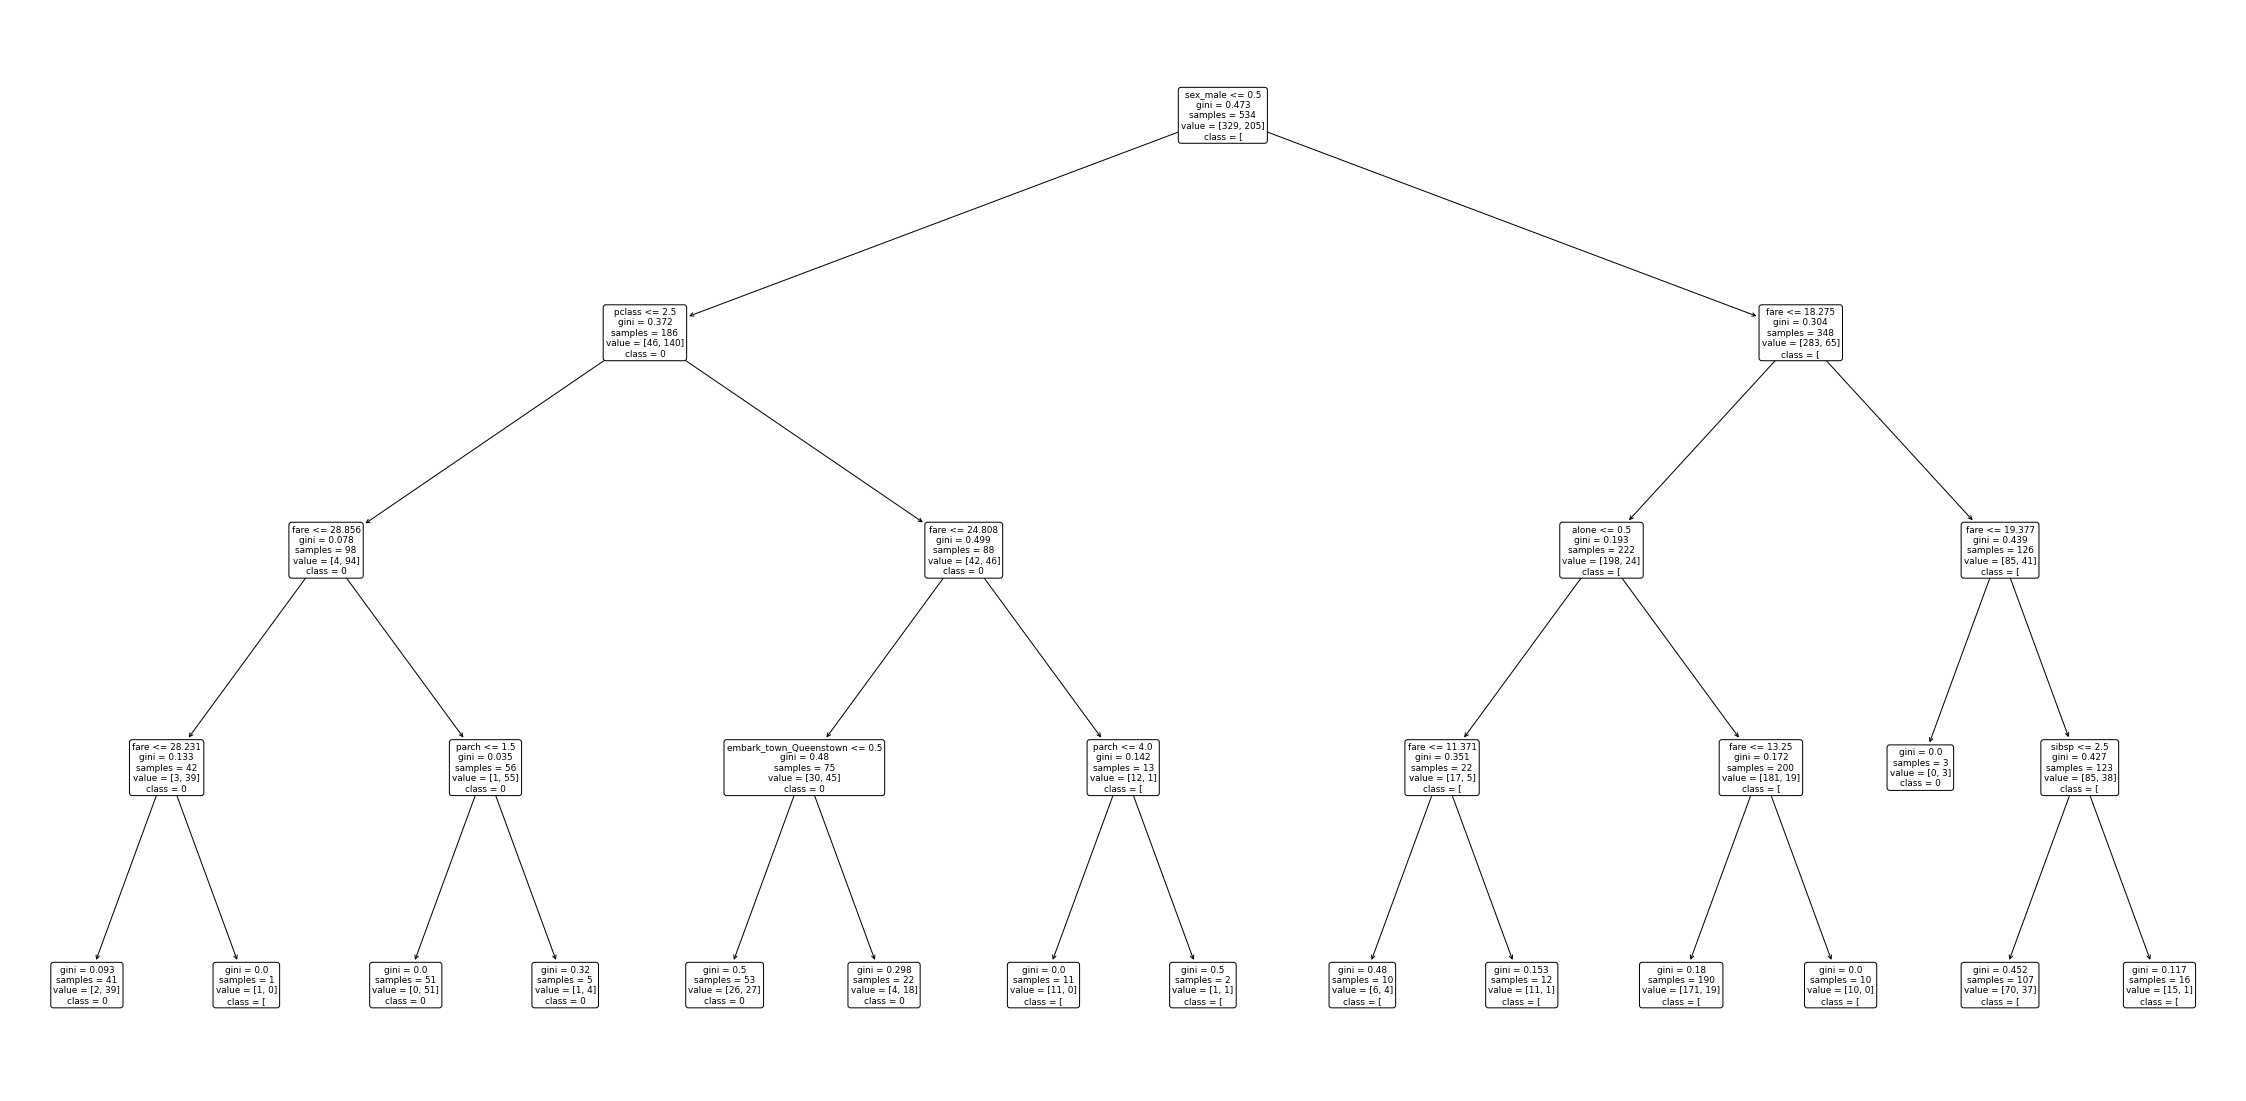

Accuracy of Decision Tree classifier(gini / 4) on training set:  0.82
        0       1
0  TN:296   FP:33
1   FN:63  TP:142
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       329
           1       0.81      0.69      0.75       205

    accuracy                           0.82       534
   macro avg       0.82      0.80      0.80       534
weighted avg       0.82      0.82      0.82       534
 ---------------4 depth set---------------
0.82 <--accuracy 0.693 <--True positive rate 0.1 <--false positive rate/recall 0.9 <--true negative rate 0.307 <--false negative rate 0.811 <--precision 0.747 <--f1_score 205 329 <--support pos, support neg

 
 
 
 

Accuracy of Decision Tree classifier (depth 4) on validate set:  0.79
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.75      0.68      0.71        68

    accuracy                           0.79       178
  

In [704]:
give_it_a_go(X_titanic_train,y_titanic_train,X_titanic_validate,y_titanic_validate,4)

-
-
-
-
-
-
-
-
-
-

Work through these same exercises using the Telco dataset.
Experiment with this model on other datasets with a higher number of output classes.

In [705]:
telco_df = prepare.prep_telco()
telco_df.total_charges.replace({" ":0,"":0},inplace=True)
telco_df.total_charges = telco_df.total_charges.astype(float)
prediction_col = "churn_encoded"

train_telco_df,test_telco_df,validate_telco_df = prepare.split_function(telco_df,prediction_col)

baseline_predict = train_telco_df[prediction_col].mode()[0]
(train_telco_df[prediction_col] == baseline_predict).mean()

print(f"{baseline_predict} <--- mode of survived in training data / baseline prediction")
print(f"{(train_telco_df[prediction_col] == baseline_predict).mean() * 100 :.2f}% <--- accuracy of baseline prediciton in training data")


prepared df shape: (7043, 31)
train shape: (4225, 31)
validate shape: (1409, 31)
test shape: (1409, 31)
0 <--- mode of survived in training data / baseline prediction
73.47% <--- accuracy of baseline prediciton in training data


In [706]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 534 non-null    int64  
 1   pclass                   534 non-null    int64  
 2   sibsp                    534 non-null    int64  
 3   parch                    534 non-null    int64  
 4   fare                     534 non-null    float64
 5   alone                    534 non-null    int64  
 6   sex_male                 534 non-null    uint8  
 7   embark_town_Queenstown   534 non-null    uint8  
 8   embark_town_Southampton  534 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 30.8 KB


In [707]:
X_telco_train = train_telco_df.drop(columns = [prediction_col])
y_telco_train = train_telco_df[prediction_col]

X_telco_validate = validate_telco_df.drop(columns = [prediction_col])
y_telco_validate = validate_telco_df[prediction_col]

X_telco_test = test_telco_df.drop(columns = [prediction_col])
y_telco_test = test_telco_df[prediction_col]

In [708]:
clf_gini0 = DecisionTreeClassifier(random_state= 123, criterion="gini")
clf_gini0 = clf_gini0.fit(X_telco_train,y_telco_train)
#clf_gini0.classes_ = str(clf_gini0.classes_)

clf_gini1 = DecisionTreeClassifier(max_depth= 1,random_state= 123, criterion="gini")
clf_gini1 = clf_gini1.fit(X_telco_train,y_telco_train)
#clf_gini1.classes_ = str(clf_gini1.classes_)
#plt.figure(figsize=(20,10))
#plot_tree(clf_gini1, feature_names=X_telco_train.columns, class_names=clf_gini1.classes_, rounded=True)

clf_gini3 = DecisionTreeClassifier(max_depth= 3, random_state= 123, criterion="gini")
clf_gini3 = clf_gini3.fit(X_telco_train,y_telco_train)
#clf_gini3.classes_ = str(clf_gini3.classes_)
#plt.figure(figsize=(20,10))
#plot_tree(clf_gini3, feature_names=X_telco_train.columns, class_names=clf_gini3.classes_, rounded=True)

clf_gini5 = DecisionTreeClassifier(max_depth= 5,random_state= 123, criterion="gini")
clf_gini5 = clf_gini5.fit(X_telco_train,y_telco_train)

clf_gini10 = DecisionTreeClassifier(max_depth= 10,random_state= 123, criterion="gini")
clf_gini10 = clf_gini10.fit(X_telco_train,y_telco_train)

plt.show()

In [709]:
y_pred_gini0 = clf_gini0.predict(X_telco_train)
y_pred_proba_gini0 = clf_gini0.predict_proba(X_telco_train)
print(y_pred_proba_gini0[0:5],"gini0")
y_pred_gini1 = clf_gini1.predict(X_telco_train)
y_pred_proba_gini1 = clf_gini1.predict_proba(X_telco_train)
print(y_pred_proba_gini1[0:5],"gini1")
y_pred_gini3 = clf_gini3.predict(X_telco_train)
y_pred_proba_gini3 = clf_gini3.predict_proba(X_telco_train)
print(y_pred_proba_gini3[0:5],"gini3")
y_pred_gini5 = clf_gini5.predict(X_telco_train)
y_pred_proba_gini5 = clf_gini5.predict_proba(X_telco_train)
print(y_pred_proba_gini5[0:5],"gini5")
y_pred_gini10 = clf_gini10.predict(X_telco_train)
y_pred_proba_gini10 = clf_gini10.predict_proba(X_telco_train)
print(y_pred_proba_gini10[0:10],"gini10")

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]] gini0
[[0.83953319 0.16046681]
 [0.83953319 0.16046681]
 [0.54079568 0.45920432]
 [0.83953319 0.16046681]
 [0.83953319 0.16046681]] gini1
[[0.90279465 0.09720535]
 [0.90279465 0.09720535]
 [0.55027933 0.44972067]
 [0.98548621 0.01451379]
 [0.61388889 0.38611111]] gini3
[[0.96463023 0.03536977]
 [0.96463023 0.03536977]
 [0.39156627 0.60843373]
 [0.99169435 0.00830565]
 [0.84375    0.15625   ]] gini5
[[1.         0.        ]
 [0.91666667 0.08333333]
 [0.24137931 0.75862069]
 [1.         0.        ]
 [0.9        0.1       ]
 [1.         0.        ]
 [0.125      0.875     ]
 [0.025      0.975     ]
 [0.92857143 0.07142857]
 [0.         1.        ]] gini10


In [710]:
labels = sorted(y_telco_train.unique())

gini0_confusion = pd.DataFrame(confusion_matrix(y_telco_train,y_pred_gini0),
                                index=labels,
                                columns=labels
                                )
TN0, FP0, FN0, TP0 = confusion_matrix(y_telco_train,y_pred_gini0).ravel()
print(gini0_confusion)
print("^^^0^^^")

gini1_confusion = pd.DataFrame(confusion_matrix(y_telco_train,y_pred_gini1),
                                index=labels,
                                columns=labels
                                )
TN1, FP1, FN1, TP1 = confusion_matrix(y_telco_train,y_pred_gini1).ravel()
print(gini1_confusion)
print("^^^1^^^")

gini3_confusion = pd.DataFrame(confusion_matrix(y_telco_train,y_pred_gini3),
                                index=labels,
                                columns=labels
                                )
TN3, FP3, FN3, TP3 = confusion_matrix(y_telco_train,y_pred_gini3).ravel()
print(gini3_confusion)
print("^^^3^^^")

gini5_confusion = pd.DataFrame(confusion_matrix(y_telco_train,y_pred_gini5),
                                index=labels,
                                columns=labels
                                )
TN5, FP5, FN5, TP5 = confusion_matrix(y_telco_train,y_pred_gini5).ravel()
print(gini5_confusion)
print("^^^5^^^")

gini10_confusion = pd.DataFrame(confusion_matrix(y_telco_train,y_pred_gini10),
                                index=labels,
                                columns=labels
                                )
TN10, FP10, FN10, TP10 = confusion_matrix(y_telco_train,y_pred_gini10).ravel()
print(gini10_confusion)
print("^^^10^^^")

      0     1
0  3103     1
1     7  1114
^^^0^^^
      0  1
0  3104  0
1  1121  0
^^^1^^^
      0    1
0  2902  202
1   698  423
^^^3^^^
      0    1
0  2752  352
1   481  640
^^^5^^^
      0    1
0  2932  172
1   316  805
^^^10^^^


In [711]:
#Remember that Accuracy is the number of correct predictions 
# over the number of total instances that have been evaluated.
print('Accuracy of Decision Tree classifier(gini / no depth) on training set: {:.2f}'
      .format(clf_gini0.score(X_telco_train, y_telco_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 1) on training set: {:.2f}'
      .format(clf_gini1.score(X_telco_train, y_telco_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 3) on training set: {:.2f}'
      .format(clf_gini3.score(X_telco_train, y_telco_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 5) on training set: {:.2f}'
      .format(clf_gini5.score(X_telco_train, y_telco_train)))
print('Accuracy of Decision Tree classifier(gini / depth - 10) on training set: {:.2f}'
      .format(clf_gini10.score(X_telco_train, y_telco_train)))


Accuracy of Decision Tree classifier(gini / no depth) on training set: 1.00
Accuracy of Decision Tree classifier(gini / depth - 1) on training set: 0.73
Accuracy of Decision Tree classifier(gini / depth - 3) on training set: 0.79
Accuracy of Decision Tree classifier(gini / depth - 5) on training set: 0.80
Accuracy of Decision Tree classifier(gini / depth - 10) on training set: 0.88


In [712]:
print(classification_report(y_telco_train,y_pred_gini0), "---------------no depth set---------------")

print(classification_report(y_telco_train,y_pred_gini1), "---------------1 depth---------------")

print(classification_report(y_telco_train,y_pred_gini3), "---------------3 depth---------------")

print(classification_report(y_telco_train,y_pred_gini5), "---------------5 depth---------------")

print(classification_report(y_telco_train,y_pred_gini10), "---------------10 depth---------------")



              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3104
           1       1.00      0.99      1.00      1121

    accuracy                           1.00      4225
   macro avg       1.00      1.00      1.00      4225
weighted avg       1.00      1.00      1.00      4225
 ---------------no depth set---------------
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      3104
           1       0.00      0.00      0.00      1121

    accuracy                           0.73      4225
   macro avg       0.37      0.50      0.42      4225
weighted avg       0.54      0.73      0.62      4225
 ---------------1 depth---------------
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3104
           1       0.68      0.38      0.48      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.66      0.68    

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


i'm seeing a trend where the more depth you add in the training the more accurate it will be (of course), however this does not help when moving into a different set of data (overfitting), so i'm not sure how to evaluate early how the models perform

can drop depth of 1 due to falling below baseline metric

In [713]:
print('Accuracy of Decision Tree classifier (gini0) on validate set: {:.2f}'
     .format(clf_gini0.score(X_telco_validate, y_telco_validate)))
print('Accuracy of Decision Tree classifier (gini3) on validate set: {:.2f}'
     .format(clf_gini3.score(X_telco_validate, y_telco_validate)))
print('Accuracy of Decision Tree classifier (gini5) on validate set: {:.2f}'
     .format(clf_gini5.score(X_telco_validate, y_telco_validate)))
print('Accuracy of Decision Tree classifier (gini10) on validate set: {:.2f}'
     .format(clf_gini10.score(X_telco_validate, y_telco_validate)))

Accuracy of Decision Tree classifier (gini0) on validate set: 0.73
Accuracy of Decision Tree classifier (gini3) on validate set: 0.79
Accuracy of Decision Tree classifier (gini5) on validate set: 0.79
Accuracy of Decision Tree classifier (gini10) on validate set: 0.76


In [714]:
# Produce y_predictions that come from the X_telco_validate
y_pred_gini0_val = clf_gini0.predict(X_telco_validate)
# Compare actual y values (from validate) to predicted y_values from the model run on X_telco_validate
print(classification_report(y_telco_validate, y_pred_gini0_val))
print("^^^^ depth of all ^^^^")
y_pred_gini3_val = clf_gini3.predict(X_telco_validate)
print(classification_report(y_telco_validate, y_pred_gini3_val))
print("^^^^ depth of 3 ^^^^")
y_pred_gini5_val = clf_gini5.predict(X_telco_validate)
print(classification_report(y_telco_validate, y_pred_gini5_val))
print("^^^^ depth of 5 ^^^^")
y_pred_gini10_val = clf_gini10.predict(X_telco_validate)
print(classification_report(y_telco_validate, y_pred_gini10_val))
print("^^^^ depth of 10 ^^^^")

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1035
           1       0.48      0.51      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.73      0.73      1409

^^^^ depth of all ^^^^
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1035
           1       0.70      0.39      0.50       374

    accuracy                           0.79      1409
   macro avg       0.75      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409

^^^^ depth of 3 ^^^^
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.62      0.57      0.60       374

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0

looks like the overfit data matches up with the mode/baseline on accuracy

accuracy : depth of 3 and 5 @ .79

recall on death: depth of 3 @ .94

recall on survived: depth of 5 @ .57

precision on death: depth of 5 @ .85

precision on survived: depth of 3 @ .78

weighted avg f1: depth of 5 @ .79

depending on what we are looking for, i would use model 3 ((recall on depth/precision on survived) good for as many real death as possible (control for false negative)) or model 5 ((precision on death/recall on survived) as many predicited death to be as correct as possible (control for false positive))

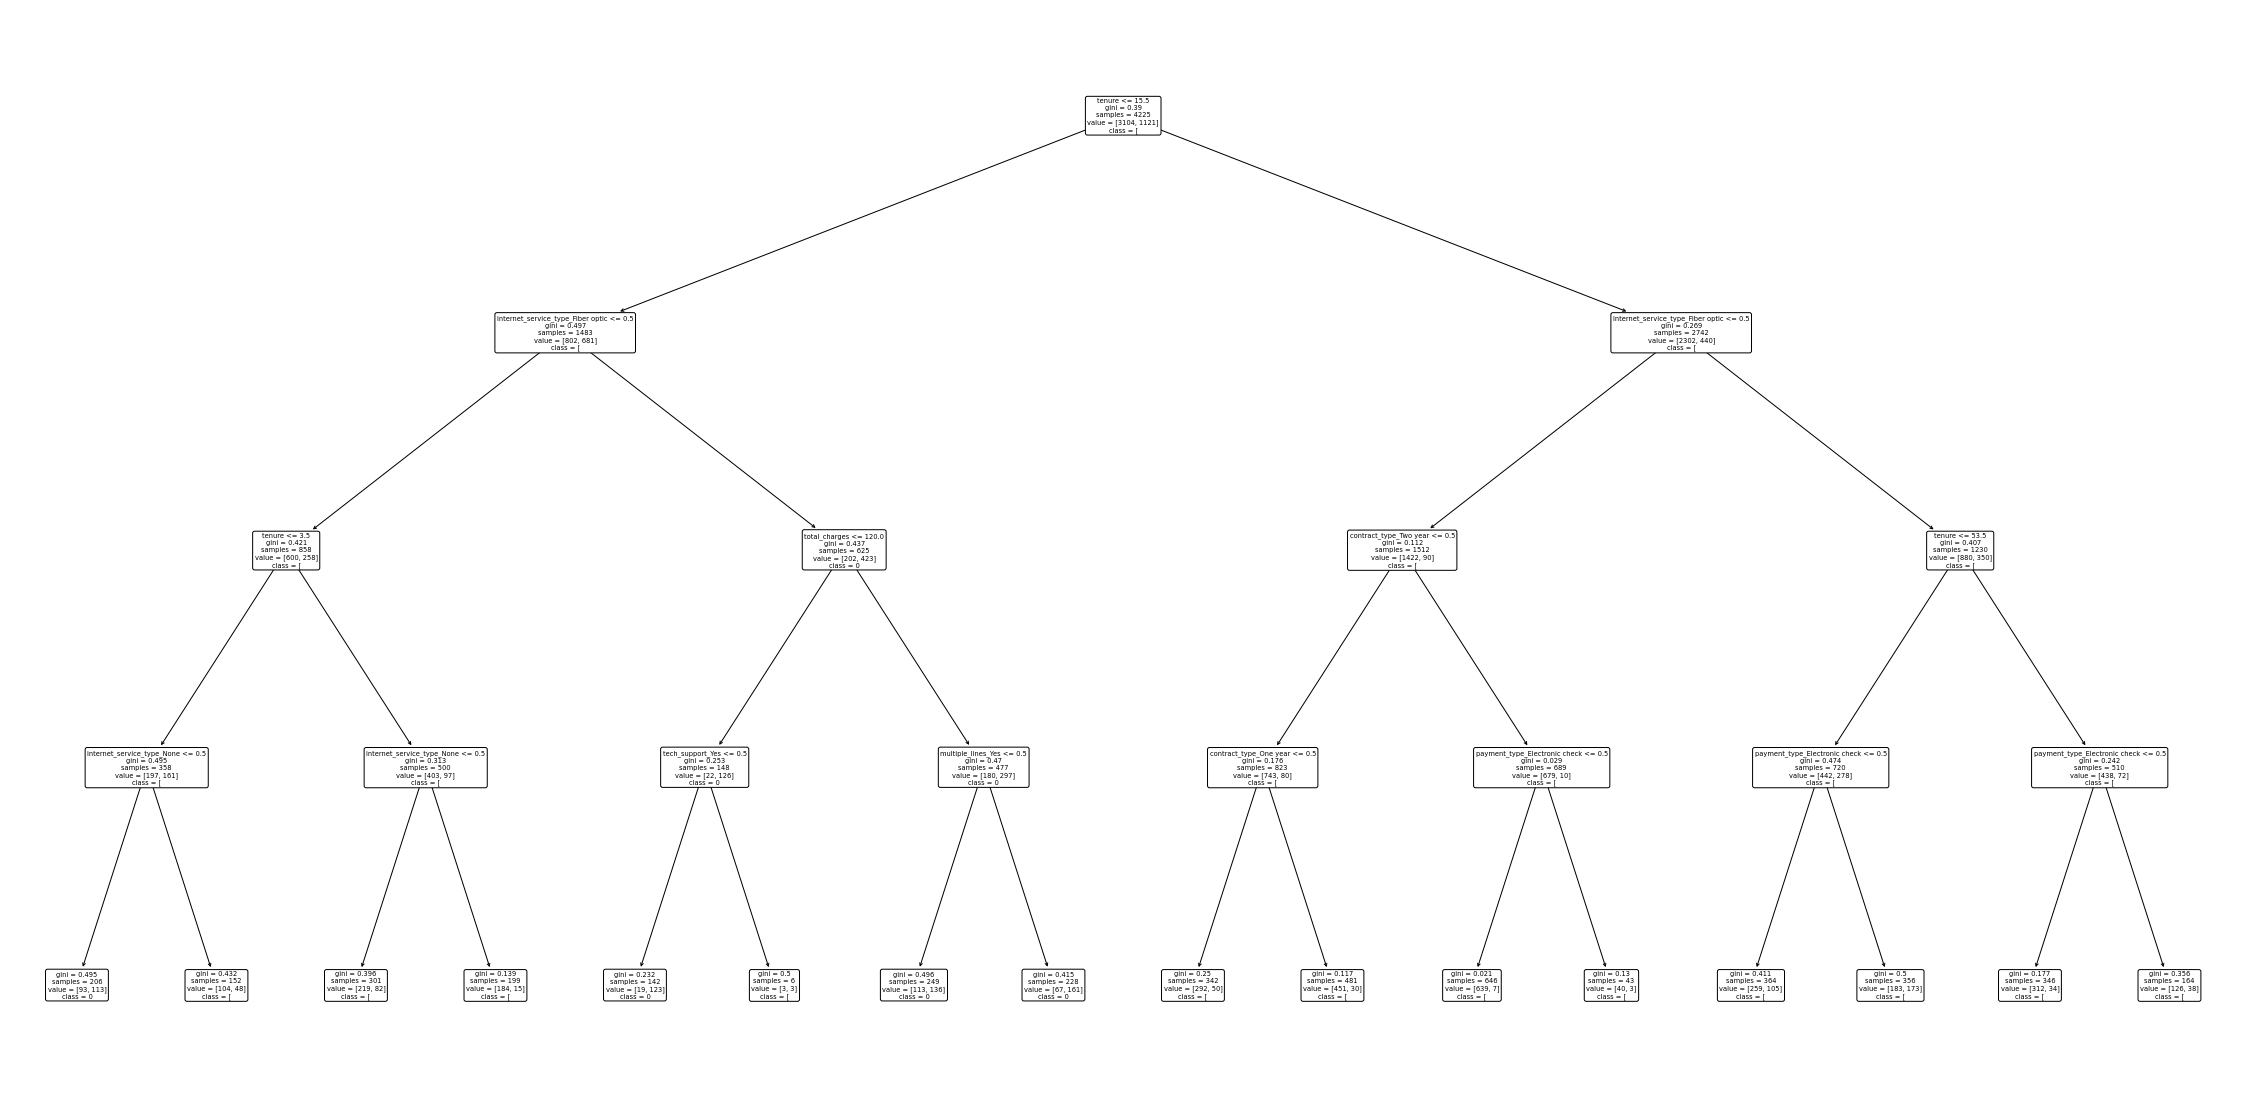

Accuracy of Decision Tree classifier(gini / 4) on training set:  0.79
         0       1
0  TN:2812  FP:292
1   FN:588  TP:533
              precision    recall  f1-score   support

           0       0.83      0.91      0.86      3104
           1       0.65      0.48      0.55      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.69      0.71      4225
weighted avg       0.78      0.79      0.78      4225
 ---------------4 depth set---------------
0.792 <--accuracy 0.475 <--True positive rate 0.094 <--false positive rate/recall 0.906 <--true negative rate 0.525 <--false negative rate 0.646 <--precision 0.548 <--f1_score 1121 3104 <--support pos, support neg

 
 
 
 

Accuracy of Decision Tree classifier (depth 4) on validate set:  0.80
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.67      0.51      0.58       374

    accuracy                           0.80   

In [715]:
give_it_a_go(X_telco_train,y_telco_train,X_telco_validate,y_telco_validate,4)

-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

In [716]:
def ran_forest_func(X_train, y_train, X_validate, y_validate, depth, leafs): 
     rf = RandomForestClassifier(bootstrap=True,
                              class_weight=None,
                              criterion="gini",
                              min_samples_leaf=leafs,
                              n_estimators=100,
                              max_depth=depth,
                              random_state=123
                              )

     rf.fit(X_train,y_train)
     #print(rf.feature_importances_) #weight of each feature

     y_pred = rf.predict(X_train)
     y_pred_proba = rf.predict_proba(X_train)

     #print('Accuracy of random forest classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
     #print(confusion_matrix(y_train, y_pred))

     TN, FP, FN, TP = confusion_matrix(y_train,y_pred).ravel()

     all = TP + FP + FN + TN
     acc = (TP + TN)/all
     TPR = recall = TP / (TP+FN)
     FPR = FP / (FP+TN)
     TNR = (TN / ( TN + FP ))
     FNR = FN / (FN + TP)
     precision = TP / (TP + FP)
     f1_score = 2*(precision*recall)/(precision+recall)
     support_pos = TP+FN
     support_neg = (FP + TN)
     #print(round(acc,3),"<--accuracy", \
     #     round(TPR,3),"<--True positive rate", \
     #     round(FPR,3), "<--false positive rate/recall", \
     #     round(TNR,3), "<--true negative rate", \
     #     round(FNR,3), "<--false negative rate", \
     #     round(precision,3), "<--precision", \
     #     round(f1_score,3),"<--f1_score", \
     #     round(support_pos,3),round(support_neg,3),"<--support pos, support neg")


     #print(classification_report(y_train, y_pred))

     #print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf.score(X_validate, y_validate)))

     #pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

     return(depth,leafs,acc,TPR,FPR,TNR,FNR,precision,f1_score,support_neg,support_pos,rf.score(X_validate, y_validate))

In [717]:
df_titanic_returned = pd.DataFrame(columns = ["depth", "leafs","acc_tr","TPR_recall","FPR","TNR","FNR","precision","f1_score","support_neg","support_pos","acc_val"])
for i in range(2,11): #not doing 1 because it creates nulls anyways
    for j in range(2,11):
        df_titanic_returned.loc[df_titanic_returned.shape[0]] = (ran_forest_func(X_titanic_train,y_titanic_train,X_titanic_validate,y_titanic_validate,i,j))

df_titanic_returned.dropna(inplace=True)

print([(str(round(df_titanic_returned[col].max(),3)) + " " + df_titanic_returned[col].name) for col in df_titanic_returned.columns])
for column in df_titanic_returned.columns:
    print(f"Maximum value of column {column},\n \t correspsonding index and values:{df_titanic_returned[column].idxmax()} , -> {round(df_titanic_returned[column].max(),3)} ")
df_titanic_returned

['10.0 depth', '10.0 leafs', '0.897 acc_tr', '0.785 TPR_recall', '0.079 FPR', '0.97 TNR', '0.478 FNR', '0.94 precision', '0.854 f1_score', '329.0 support_neg', '205.0 support_pos', '0.815 acc_val']
Maximum value of column depth,
 	 correspsonding index and values:72 , -> 10.0 
Maximum value of column leafs,
 	 correspsonding index and values:8 , -> 10.0 
Maximum value of column acc_tr,
 	 correspsonding index and values:72 , -> 0.897 
Maximum value of column TPR_recall,
 	 correspsonding index and values:72 , -> 0.785 
Maximum value of column FPR,
 	 correspsonding index and values:11 , -> 0.079 
Maximum value of column TNR,
 	 correspsonding index and values:36 , -> 0.97 
Maximum value of column FNR,
 	 correspsonding index and values:0 , -> 0.478 
Maximum value of column precision,
 	 correspsonding index and values:63 , -> 0.94 
Maximum value of column f1_score,
 	 correspsonding index and values:72 , -> 0.854 
Maximum value of column support_neg,
 	 correspsonding index and values:

,depth,leafs,acc_tr,TPR_recall,FPR,TNR,FNR,precision,f1_score,support_neg,support_pos,acc_val
0,2.0,2.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
1,2.0,3.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
2,2.0,4.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
3,2.0,5.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
4,2.0,6.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
5,2.0,7.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
6,2.0,8.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
7,2.0,9.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
8,2.0,10.0,0.794007,0.521951,0.036474,0.963526,0.478049,0.899160,0.660494,329.0,205.0,0.786517
9,3.0,2.0,0.822097,0.658537,0.075988,0.924012,0.341463,0.843750,0.739726,329.0,205.0,0.792135


In [718]:
df_titanic_returned.loc[df_titanic_returned["acc_val"].idxmax()]

depth            9.000000
leafs            4.000000
acc_tr           0.859551
TPR_recall       0.702439
FPR              0.042553
TNR              0.957447
FNR              0.297561
precision        0.911392
f1_score         0.793388
support_neg    329.000000
support_pos    205.000000
acc_val          0.814607
Name: 65, dtype: float64

<AxesSubplot:>

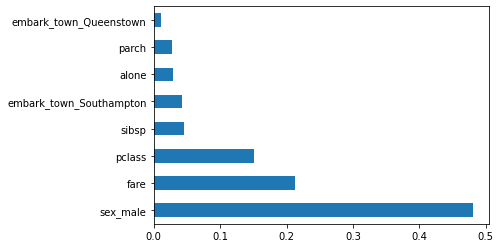

In [719]:
rf = RandomForestClassifier(bootstrap=True,
                              class_weight=None,
                              criterion="gini",
                              min_samples_leaf=10,
                              n_estimators=100,
                              max_depth=4,
                              random_state=123
                              )

rf.fit(X_titanic_train,y_titanic_train)

pd.Series(rf.feature_importances_, index=X_titanic_train.columns).nlargest(10).plot(kind='barh')


-
-
-
-
-
-
-
-
-
-

In [720]:
df_telco_returned = pd.DataFrame(columns = ["depth", "leafs","acc","TPR/recall","FPR","TNR","FNR","precision","f1_score","support_neg","support_pos","acc_val"])
for i in range(2,11): #not doing 1 because it creates nulls anyways
    for j in range(11, 2,-1):
        df_telco_returned.loc[df_telco_returned.shape[0]] = (ran_forest_func(X_telco_train,y_telco_train,X_telco_validate,y_telco_validate,i,j))
df_telco_returned.head()

,depth,leafs,acc,TPR/recall,FPR,TNR,FNR,precision,f1_score,support_neg,support_pos,acc_val
0,2.0,11.0,0.76071,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
1,2.0,10.0,0.76071,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
2,2.0,9.0,0.76071,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
3,2.0,8.0,0.76071,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
4,2.0,7.0,0.76071,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694


In [721]:
df_telco_returned.dropna(inplace=True)
print([(str(round(df_telco_returned[col].max(),3)) + " " + df_telco_returned[col].name) for col in df_telco_returned.columns])
for column in df_telco_returned.columns:
    print(f"Maximum value of column {column},\n \t correspsonding index and values:{df_telco_returned[column].idxmax()} , -> {round(df_telco_returned[column].max(),3)} ")
df_telco_returned

['10.0 depth', '11.0 leafs', '0.854 acc', '0.608 TPR/recall', '0.077 FPR', '0.989 TNR', '0.872 FNR', '0.809 precision', '0.689 f1_score', '3104.0 support_neg', '1121.0 support_pos', '0.813 acc_val']
Maximum value of column depth,
 	 correspsonding index and values:72 , -> 10.0 
Maximum value of column leafs,
 	 correspsonding index and values:0 , -> 11.0 
Maximum value of column acc,
 	 correspsonding index and values:80 , -> 0.854 
Maximum value of column TPR/recall,
 	 correspsonding index and values:80 , -> 0.608 
Maximum value of column FPR,
 	 correspsonding index and values:51 , -> 0.077 
Maximum value of column TNR,
 	 correspsonding index and values:0 , -> 0.989 
Maximum value of column FNR,
 	 correspsonding index and values:0 , -> 0.872 
Maximum value of column precision,
 	 correspsonding index and values:0 , -> 0.809 
Maximum value of column f1_score,
 	 correspsonding index and values:80 , -> 0.689 
Maximum value of column support_neg,
 	 correspsonding index and values:0 

,depth,leafs,acc,TPR/recall,FPR,TNR,FNR,precision,f1_score,support_neg,support_pos,acc_val
0,2.0,11.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
1,2.0,10.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
2,2.0,9.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
3,2.0,8.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
4,2.0,7.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
5,2.0,6.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
6,2.0,5.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
7,2.0,4.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
8,2.0,3.0,0.760710,0.128457,0.010954,0.989046,0.871543,0.808989,0.221709,3104.0,1121.0,0.758694
9,3.0,11.0,0.779882,0.278323,0.038982,0.961018,0.721677,0.720554,0.401544,3104.0,1121.0,0.778566


In [722]:
df_telco_returned.loc[df_telco_returned["acc_val"].idxmax()]

depth             7.000000
leafs             5.000000
acc               0.813964
TPR/recall        0.511151
FPR               0.076675
TNR               0.923325
FNR               0.488849
precision         0.706535
f1_score          0.593168
support_neg    3104.000000
support_pos    1121.000000
acc_val           0.812633
Name: 51, dtype: float64

<AxesSubplot:>

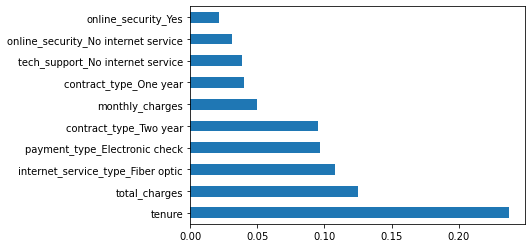

In [723]:
rf = RandomForestClassifier(bootstrap=True,
                              class_weight=None,
                              criterion="gini",
                              min_samples_leaf=10,
                              n_estimators=100,
                              max_depth=4,
                              random_state=123
                              )

rf.fit(X_telco_train,y_telco_train)

pd.Series(rf.feature_importances_, index=X_telco_train.columns).nlargest(10).plot(kind='barh')


In [724]:
classification_report(y_telco_train,rf.predict(X_telco_train))

'              precision    recall  f1-score   support\n\n           0       0.81      0.93      0.87      3104\n           1       0.69      0.41      0.51      1121\n\n    accuracy                           0.79      4225\n   macro avg       0.75      0.67      0.69      4225\nweighted avg       0.78      0.79      0.77      4225\n'

In [725]:
temp_df = pd.DataFrame(classification_report(y_telco_train,rf.predict(X_telco_train),output_dict=True))
temp_df

,0,1,accuracy,macro avg,weighted avg
precision,0.813307,0.687783,0.793609,0.750545,0.780002
recall,0.933312,0.406780,0.793609,0.670046,0.793609
f1-score,0.869187,0.511211,0.793609,0.690199,0.774207
support,3104.000000,1121.000000,0.793609,4225.000000,4225.000000


-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-
-

Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

Evaluate your results using the model score, confusion matrix, and classification report.

Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 setting k to 10

Run through setps 2-4 setting k to 20

What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

Which model performs best on our out-of-sample data from validate?

In [726]:
# read Iris data from pydatset
df = data('iris')

# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [727]:
def knn_function(X_train,y_train,X_validate,y_validate,knn_val):
    ''' 
    takes in X train, y train, X validate, y validate, and knn values
    seems like i'm gonna need to run this a few times
    made a function
    '''
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=knn_val, weights='uniform')

    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_pred_val = knn.predict(X_validate)

    y_pred_proba = knn.predict_proba(X_train)

    #print(f'Accuracy of KNN {knn_val} classifier on training set: \
    #    {knn.score(X_train, y_train):.2f}')

    #print(f'Accuracy of KNN {knn_val} classifier on validate set: \
    #    {knn.score(X_validate, y_validate):.2f}')

    #print(confusion_matrix(y_train, y_pred))
    df1 = pd.DataFrame(classification_report(y_train, y_pred_train, output_dict=True))
    df2 = pd.DataFrame(classification_report(y_validate, y_pred_val, output_dict=True))
    
    #print(df)
    return df1,df2

In [728]:
knn_titanic_df = pd.DataFrame()

for i in range(1,30+1):
    df1, df2 = knn_function(X_titanic_train,y_titanic_train,X_titanic_validate,y_titanic_validate,i)
    df1 = df1.add_suffix("_train")
    df2 = df2.add_suffix("_val")
    df1 = pd.merge(df1,df2,left_index=True,right_index=True)
    
    df1["KNN"] = i

    knn_titanic_df = pd.concat([knn_titanic_df,df1],join="outer",sort=False)

knn_titanic_df = knn_titanic_df.reset_index().rename(columns={"index":"metric"})
knn_titanic_df.head()


,metric,0_train,1_train,accuracy_train,macro avg_train,weighted avg_train,0_val,1_val,accuracy_val,macro avg_val,weighted avg_val,KNN
0,precision,0.945289,0.912195,0.932584,0.928742,0.932584,0.761905,0.589041,0.691011,0.675473,0.695867,1
1,recall,0.945289,0.912195,0.932584,0.928742,0.932584,0.727273,0.632353,0.691011,0.679813,0.691011,1
2,f1-score,0.945289,0.912195,0.932584,0.928742,0.932584,0.744186,0.609929,0.691011,0.677058,0.692897,1
3,support,329.000000,205.000000,0.932584,534.000000,534.000000,110.000000,68.000000,0.691011,178.000000,178.000000,1
4,precision,0.829897,0.952055,0.863296,0.890976,0.876793,0.729323,0.711111,0.724719,0.720217,0.722366,2


In [729]:
knn_titanic_df = knn_titanic_df.drop(knn_titanic_df[knn_titanic_df["metric"] == "support"].index)

In [730]:
print(knn_titanic_df.groupby(["metric"])["0_train"].agg("max"),"\n ^^^^training^^^^")
print(knn_titanic_df.groupby(["metric"])["0_val"].agg("max"),"\n ^^^^validation^^^^ \n")
print(knn_titanic_df["accuracy_train"].agg("max"),"\n ^^^^train accuracy max^^^^")
print(knn_titanic_df["accuracy_val"].agg("max"),"\n ^^^^validation accuracy max^^^^")


metric
f1-score     0.945289
precision    0.945289
recall       0.978723
Name: 0_train, dtype: float64 
 ^^^^training^^^^
metric
f1-score     0.804979
precision    0.792453
recall       0.881818
Name: 0_val, dtype: float64 
 ^^^^validation^^^^ 

0.9325842696629213 
 ^^^^train accuracy max^^^^
0.7359550561797753 
 ^^^^validation accuracy max^^^^


-
-
-
-
-
-
-
-
-
-

In [731]:
knn_telco_df = pd.DataFrame()

for i in range(1,30+1):
    df1, df2 = knn_function(X_telco_train,y_telco_train,X_telco_validate,y_telco_validate,i)
    df1 = df1.add_suffix("_train")
    df2 = df2.add_suffix("_val")
    df1 = pd.merge(df1,df2,left_index=True,right_index=True)
    
    df1["KNN"] = i

    knn_telco_df = pd.concat([knn_telco_df,df1],join="outer",sort=False)

knn_telco_df = knn_telco_df.reset_index().rename(columns={"index":"metric"})
knn_telco_df.head()

,metric,0_train,1_train,accuracy_train,macro avg_train,weighted avg_train,0_val,1_val,accuracy_val,macro avg_val,weighted avg_val,KNN
0,precision,0.998711,0.996432,0.998107,0.997572,0.998107,0.796905,0.437333,0.701207,0.617119,0.701462,1
1,recall,0.998711,0.996432,0.998107,0.997572,0.998107,0.796135,0.438503,0.701207,0.617319,0.701207,1
2,f1-score,0.998711,0.996432,0.998107,0.997572,0.998107,0.796520,0.437917,0.701207,0.617219,0.701334,1
3,support,3104.000000,1121.000000,0.998107,4225.000000,4225.000000,1035.000000,374.000000,0.701207,1409.000000,1409.000000,1
4,precision,0.836163,0.998054,0.855858,0.917109,0.879117,0.774940,0.589744,0.754436,0.682342,0.725782,2


In [732]:
knn_telco_df = knn_telco_df.drop(knn_telco_df[knn_telco_df["metric"] == "support"].index)

In [733]:
print(knn_telco_df.groupby(["metric"])["1_train","1_val"].agg("max"),"\n ^^^^max of metric for churn^^^^ \n")

print(knn_telco_df.groupby(["metric"])["1_train","1_val"].agg("max"),"\n ^^^^max metric for churn with KNN^^^^ \n")

print(knn_telco_df["accuracy_train"].max(),"\n ^^^^train accuracy max^^^^")
print(knn_telco_df["accuracy_val"].max(),"\n ^^^^validation accuracy max^^^^")


            1_train     1_val
metric                       
f1-score   0.996432  0.531722
precision  0.998054  0.723164
recall     0.996432  0.470588 
 ^^^^max of metric for churn^^^^ 

            1_train     1_val
metric                       
f1-score   0.996432  0.531722
precision  0.998054  0.723164
recall     0.996432  0.470588 
 ^^^^max metric for churn with KNN^^^^ 

0.9981065088757396 
 ^^^^train accuracy max^^^^
0.7934705464868701 
 ^^^^validation accuracy max^^^^


/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_52793/693598741.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(knn_telco_df.groupby(["metric"])["1_train","1_val"].agg("max"),"\n ^^^^max of metric for churn^^^^ \n")
/var/folders/c6/16b7dgw96t19zlzn79g4rd9r0000gn/T/ipykernel_52793/693598741.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(knn_telco_df.groupby(["metric"])["1_train","1_val"].agg("max"),"\n ^^^^max metric for churn with KNN^^^^ \n")
